# Regras de Associação

## Biblioteca

In [2]:
#install.packages('arules')
library(arules)

## Carregar a Base de Dados

- **rm.duplicates** - Irá remover os item das transações que repetem o item, como {'leite', 'arroz', 'leite'} -> {'arroz', 'leite'}

In [27]:
mercado1 = read.transactions('../datasets/mercado1.csv', sep = ',', rm.duplicates = TRUE)

Warning message in readLines(file, encoding = encoding):
"linha final incompleta encontrada em 'datasets/mercado1.csv'"

## Descrevendo as transações
- **rows** (elements/itemsets/transactions) - Indica o números de transações feitas.
- **columns** (items) Indica o número de itens
- **density** - Mostra a porcentagem de preenchimento das transações. 
- **most frequent items** - Mosta os item mais frequêntes em uma transação

In [29]:
summary(mercado1)

transactions as itemMatrix in sparse format with
 10 rows (elements/itemsets/transactions) and
 7 columns (items) and a density of 0.3 

most frequent items:
manteiga      pao     cafe    arroz  cerveja  (Other) 
       5        5        3        2        2        4 

element (itemset/transaction) length distribution:
sizes
1 2 3 4 
5 1 2 2 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0     1.0     1.5     2.1     3.0     4.0 

includes extended item information - examples:
   labels
1   arroz
2    cafe
3 cerveja

## Gráfico de frequência

- **topN** - Indica o número de itens que queremos ver em ordem decrescente. 

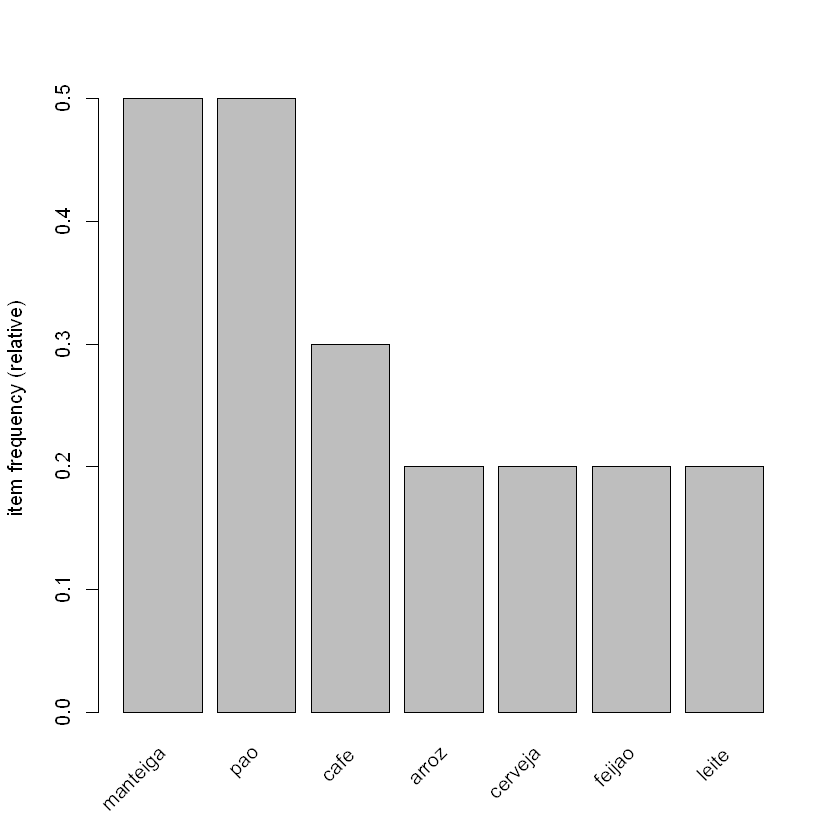

In [32]:
itemFrequencyPlot(mercado1, topN = 7)

## Gerar Geras

- **parameter** - Recebe uma lista de parâmetros a serem usados como
    - support - A porcentagem mínima de suporte que deve ser aceito
    - confidence - A porcentagem mínima de confiança que deve ser aceito
    - minlen - O número mínimos de itens em um itemset para ser considerado. 
    - maxlen - O número máximo de itens em um itemset para ser considerado.
- writing ... - Mostra o número de regras geradas

In [9]:
regras = apriori(data = mercado1, parameter = list(support = 0.3, confidence = 0.8))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5     0.3      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 3 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[7 item(s), 10 transaction(s)] done [0.00s].
sorting and recoding items ... [3 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [6 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


## Ver Regras

In [10]:
inspect(regras)

    lhs                rhs        support confidence coverage lift count
[1] {cafe}          => {manteiga} 0.3     1.0        0.3      2.0  3    
[2] {cafe}          => {pao}      0.3     1.0        0.3      2.0  3    
[3] {manteiga}      => {pao}      0.4     0.8        0.5      1.6  4    
[4] {pao}           => {manteiga} 0.4     0.8        0.5      1.6  4    
[5] {cafe,manteiga} => {pao}      0.3     1.0        0.3      2.0  3    
[6] {cafe,pao}      => {manteiga} 0.3     1.0        0.3      2.0  3    


### Ordenar Regras

- Podemos usar a função sort para ordenar as regras
- Como é um vetor, podemos especificar um intervalo de regras, caso hajam muitas. 

In [12]:
inspect(sort(regras, by = 'lift'))

    lhs                rhs        support confidence coverage lift count
[1] {cafe}          => {manteiga} 0.3     1.0        0.3      2.0  3    
[2] {cafe}          => {pao}      0.3     1.0        0.3      2.0  3    
[3] {cafe,manteiga} => {pao}      0.3     1.0        0.3      2.0  3    
[4] {cafe,pao}      => {manteiga} 0.3     1.0        0.3      2.0  3    
[5] {manteiga}      => {pao}      0.4     0.8        0.5      1.6  4    
[6] {pao}           => {manteiga} 0.4     0.8        0.5      1.6  4    


# Segundo Exemplo

- **rm.duplicates** - Irá remover os item das transações que repetem o item, como {'leite', 'arroz', 'leite'} -> {'arroz', 'leite'}

In [30]:
mercado = read.transactions('datasets/mercado2.csv', sep = ',', rm.duplicates = TRUE)

distribution of transactions with duplicates:
1 
5 


## Descrevendo as transações
- **rows** (elements/itemsets/transactions) - Indica o números de transações feitas.
- **columns** (items) Indica o número de itens
- **density** - Mostra a porcentagem de preenchimento das transações. 
- **most frequent items** - Mosta os item mais frequêntes em uma transação

In [31]:
summary(mercado)

transactions as itemMatrix in sparse format with
 7501 rows (elements/itemsets/transactions) and
 119 columns (items) and a density of 0.03288973 

most frequent items:
mineral water          eggs     spaghetti  french fries     chocolate 
         1788          1348          1306          1282          1229 
      (Other) 
        22405 

element (itemset/transaction) length distribution:
sizes
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
1754 1358 1044  816  667  493  391  324  259  139  102   67   40   22   17    4 
  18   19   20 
   1    2    1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   3.914   5.000  20.000 

includes extended item information - examples:
             labels
1           almonds
2 antioxydant juice
3         asparagus

## Gráfico de frequência

- **topN** - Indica o número de itens que queremos ver em ordem decrescente. 

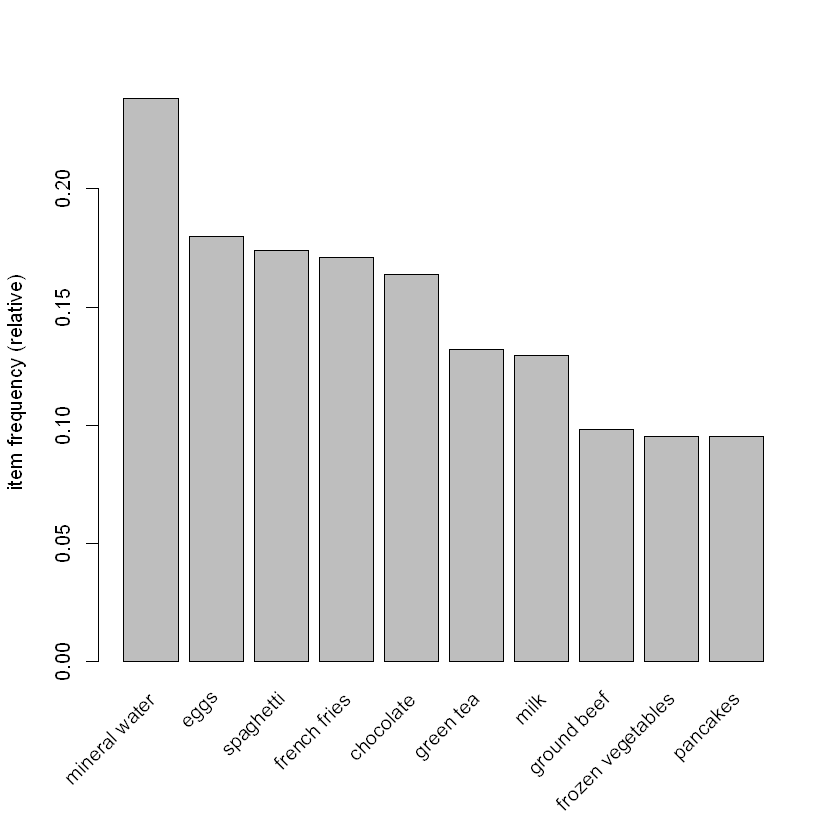

In [33]:
itemFrequencyPlot(mercado, topN = 10)

## Gerar Geras

- **parameter** - Recebe uma lista de parâmetros a serem usados como
    - support - A porcentagem mínima de suporte que deve ser aceito
    - confidence - A porcentagem mínima de confiança que deve ser aceito
    - minlen - O número mínimos de itens em um itemset para ser considerado. 
    - maxlen - O número máximo de itens em um itemset para ser considerado.
- writing ... - Mostra o número de regras geradas

In [35]:
regras = apriori(data = mercado, parameter = list(support = 0.003, confidence = 0.3))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.3    0.1    1 none FALSE            TRUE       5   0.003      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 22 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[119 item(s), 7501 transaction(s)] done [0.01s].
sorting and recoding items ... [115 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 done [0.00s].
writing ... [670 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


## Ver Regras

-  **Ordenar Regras**
    - Podemos usar a função sort para ordenar as regras
    - Como é um vetor, podemos especificar um intervalo de regras, caso hajam muitas. 

In [36]:
inspect(sort(regras, by = 'lift')[1:20])

     lhs                    rhs                     support confidence    coverage     lift count
[1]  {mineral water,                                                                             
      whole wheat pasta} => {olive oil}         0.003866151  0.4027778 0.009598720 6.115863    29
[2]  {spaghetti,                                                                                 
      tomato sauce}      => {ground beef}       0.003066258  0.4893617 0.006265831 4.980600    23
[3]  {pasta}             => {escalope}          0.005865885  0.3728814 0.015731236 4.700812    44
[4]  {french fries,                                                                              
      herb & pepper}     => {ground beef}       0.003199573  0.4615385 0.006932409 4.697422    24
[5]  {cereals,                                                                                   
      spaghetti}         => {ground beef}       0.003066258  0.4600000 0.006665778 4.681764    23
[6]  {frozen vegetab

# ECLAT

- É usado basicamnete para ver os itemsets mais frequêntes das entre as transações. Ou seja **apenas o support**

## Carregar Transações

In [46]:
base = read.transactions('datasets/mercado2.csv', sep = ',', rm.duplicates = TRUE)

distribution of transactions with duplicates:
1 
5 


## Gerar Itemset Frequentes

- Funciona como o algoritmo apriori, mas não tem  a confiânça e o lift
- Não gera geras, apenas os conjuntos mais frequentes
- Absolute minimum support count - Mostra a quantidade de itemsets gerados para aquela confiância

In [47]:
itemsets = eclat(data = base, parameter = list(support = 0.003, minlen = 3))

Eclat

parameter specification:
 tidLists support minlen maxlen            target  ext
    FALSE   0.003      3     10 frequent itemsets TRUE

algorithmic control:
 sparse sort verbose
      7   -2    TRUE

Absolute minimum support count: 22 

create itemset ... 
set transactions ...[119 item(s), 7501 transaction(s)] done [0.01s].
sorting and recoding items ... [115 item(s)] done [0.00s].
creating sparse bit matrix ... [115 row(s), 7501 column(s)] done [0.00s].
writing  ... [542 set(s)] done [0.02s].
Creating S4 object  ... done [0.00s].


## Ver os Itemset mais Frequentes

-  **Ordenar Regras**
    - Podemos usar a função sort para ordenar as regras
    - Como é um vetor, podemos especificar um intervalo de regras, caso hajam muitas. 

In [49]:
inspect(sort(itemsets, by = 'support')[1:5])

    items                                 support    transIdenticalToItemsets
[1] {ground beef,mineral water,spaghetti} 0.01706439 128                     
[2] {chocolate,mineral water,spaghetti}   0.01586455 119                     
[3] {milk,mineral water,spaghetti}        0.01573124 118                     
[4] {eggs,mineral water,spaghetti}        0.01426476 107                     
[5] {chocolate,milk,mineral water}        0.01399813 105                     
    count
[1] 128  
[2] 119  
[3] 118  
[4] 107  
[5] 105  
